# Descriptive Statistics :
1) How many students are in the dataset?: 1100
2) What is the average anxiety level of students in the dataset?: 11.063636
3) How many students have reported a history of mental health issues?: 542
# Psychological Factors:
1) How many students have a self-esteem level below the average?: 507
2) What percentage of students have reported experiencing depression?: 46%
# Physiological Factors:
1) How many students experience headaches frequently?: 556
2) What is the average blood pressure reading among the students?: 2.181818
3) How many students rate their sleep quality as poor?: 550
# Environmental Factors:
1) How many students live in conditions with high noise levels?: 563
2) What percentage of students feel unsafe in their living conditions?: 51%
# Social Factors:
1) How many students feel they have strong social support?: 600
2) What percentage of students have experienced bullying?: 50%
3) How many students participate in extracurricular activities?: 50%
# Comparative Analysis:
1) Is there a correlation between anxiety level and academic performance?: Yes(0.5860641792302574)
2) Do students with poor sleep quality also report higher levels of depression?: Yes
3) Are students who experience bullying more likely to have a history of mental health issues?: Yes

In [34]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [2]:
data_of_stress=pd.read_csv('/Users/maksimtrebusinin/Downloads/StressLevelDataset.csv')

In [3]:
data_of_stress

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,11,17,0,14,3,1,3,2,2,2,...,3,2,2,2,3,3,2,3,3,1
1096,9,12,0,8,0,3,0,0,0,1,...,4,0,1,1,1,1,3,4,3,2
1097,4,26,0,3,1,2,5,2,2,3,...,4,5,1,4,1,3,1,2,1,0
1098,21,0,1,19,5,3,1,4,3,1,...,1,2,5,1,4,1,4,4,4,2


In [8]:
data_of_stress.columns

Index(['anxiety_level', 'self_esteem', 'mental_health_history', 'depression',
       'headache', 'blood_pressure', 'sleep_quality', 'breathing_problem',
       'noise_level', 'living_conditions', 'safety', 'basic_needs',
       'academic_performance', 'study_load', 'teacher_student_relationship',
       'future_career_concerns', 'social_support', 'peer_pressure',
       'extracurricular_activities', 'bullying', 'stress_level'],
      dtype='object')

In [10]:
data_of_stress['stress_level'].unique()

array([1, 2, 0])

In [5]:
data_of_stress[['sleep_quality','depression']].query('sleep_quality<=3')

,sleep_quality,depression
0,2,11
1,1,15
2,2,14
3,1,15
5,1,21
...,...,...
1092,3,9
1095,3,14
1096,0,8
1098,1,19


<Axes: xlabel='sleep_quality', ylabel='depression'>

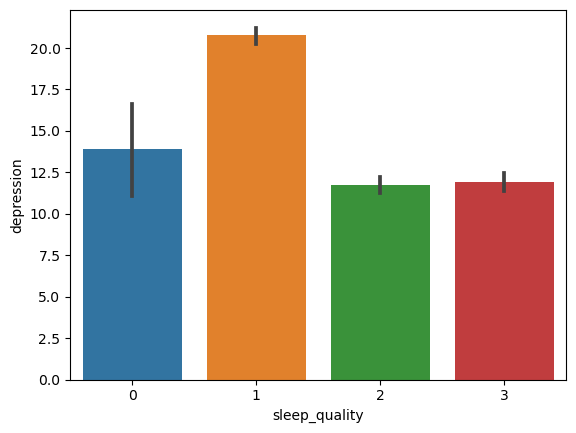

In [6]:
sns.barplot(x="sleep_quality", y="depression", data=data_of_stress[['sleep_quality','depression']].query('sleep_quality<=3'))

In [7]:
data_of_stress['anxiety_level'].corr(data_of_stress['study_load'])

0.5860641792302574

<Axes: xlabel='bullying', ylabel='mental_health_history'>

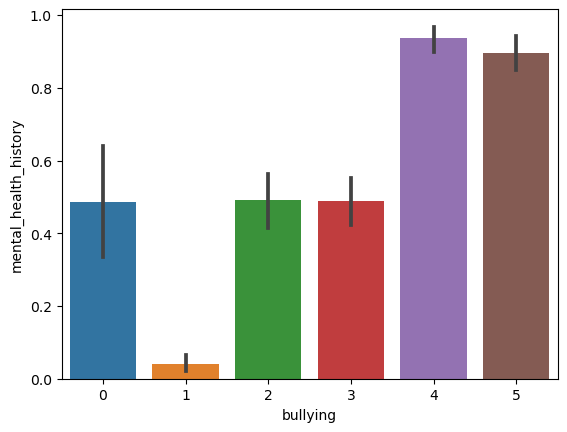

In [9]:
sns.barplot(x='bullying',y='mental_health_history', data=data_of_stress)

In [12]:
data_of_stress.head(3)

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1


In [14]:
X=data_of_stress.drop('stress_level', axis=1)
y=data_of_stress.stress_level

In [16]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.25, random_state=42)

In [26]:
clf=RandomForestClassifier()
parametrs_for_clf={'n_estimators': [10,12,14,16], 'max_depth': range(1,10), 'min_samples_split':[2,4,6,8], 
                   'min_samples_leaf': range(4,10)}

In [27]:
grid_search_clf=GridSearchCV(clf, parametrs_for_clf, cv=5, n_jobs=-1)

In [28]:
grid_search_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(1, 10),
                         'min_samples_leaf': range(4, 10),
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [10, 12, 14, 16]})

In [30]:
my_best_forest=grid_search_clf.best_estimator_

In [31]:
predict_stress_level=my_best_forest.predict(X_test)

In [33]:
accuracy_score(y_test, predict_stress_level)

0.88

In [39]:
predictions=my_best_forest.predict(X)

In [41]:
data_of_stress['predictions']=predictions

In [42]:
data_of_stress

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level,predictions
0,14,20,0,11,2,1,2,4,2,3,...,3,2,3,3,2,3,3,2,1,1
1,15,8,1,15,5,3,1,4,3,1,...,1,4,1,5,1,4,5,5,2,2
2,12,18,1,14,2,1,2,2,2,2,...,2,3,3,2,2,3,2,2,1,1
3,16,12,1,15,4,3,1,3,4,2,...,2,4,1,4,1,4,4,5,2,2
4,16,28,0,7,2,3,5,1,3,2,...,4,3,1,2,1,5,0,5,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,11,17,0,14,3,1,3,2,2,2,...,2,2,2,3,3,2,3,3,1,1
1096,9,12,0,8,0,3,0,0,0,1,...,0,1,1,1,1,3,4,3,2,0
1097,4,26,0,3,1,2,5,2,2,3,...,5,1,4,1,3,1,2,1,0,0
1098,21,0,1,19,5,3,1,4,3,1,...,2,5,1,4,1,4,4,4,2,2
